In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patheffects as path_effects

import json
from PIL import Image
from mplsoccer import FontManager, add_image

In [2]:
font_normal = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Bold.ttf?raw=true"
))
font_medium = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Medium.ttf?raw=true"
))
font_italic = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Italic.ttf?raw=true"
))

In [3]:
data = json.load(open("../_data_/shot_counts.json"))
corner_data = json.load(open("../_data_/corner_counts.json"))

for key in data:
    data[key] = data[key] / corner_data[key]

data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=False)}

data

{'Real Madrid': 0.23026315789473684,
 'Getafe': 0.23448275862068965,
 'Deportivo Alaves': 0.24378109452736318,
 'Osasuna': 0.25,
 'Sevilla': 0.25477707006369427,
 'Real Betis': 0.25949367088607594,
 'Celta Vigo': 0.29518072289156627,
 'Cadiz': 0.2961165048543689,
 'Granada': 0.2972972972972973,
 'Eibar': 0.2978723404255319,
 'Elche': 0.29878048780487804,
 'Villarreal': 0.29931972789115646,
 'Athletic Bilbao': 0.29936305732484075,
 'Real Valladolid': 0.30927835051546393,
 'Barcelona': 0.32857142857142857,
 'Levante': 0.33519553072625696,
 'Real Sociedad': 0.3464566929133858,
 'SD Huesca': 0.34782608695652173,
 'Atletico': 0.35625,
 'Valencia': 0.37}

In [4]:
teams = list(data.keys())
shots = np.array(list(data.values()))

In [5]:
# shots_per_90 = shots / 38
median_value = np.median(shots)

In [6]:
median_value

0.298326414115205

In [7]:
shots

array([0.23026316, 0.23448276, 0.24378109, 0.25      , 0.25477707,
       0.25949367, 0.29518072, 0.2961165 , 0.2972973 , 0.29787234,
       0.29878049, 0.29931973, 0.29936306, 0.30927835, 0.32857143,
       0.33519553, 0.34645669, 0.34782609, 0.35625   , 0.37      ])

In [9]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

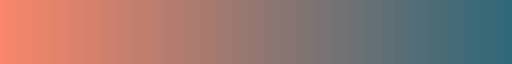

In [10]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom cmap', ["#F9876B", '#2f6879'], N=400)
cmap

In [11]:
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

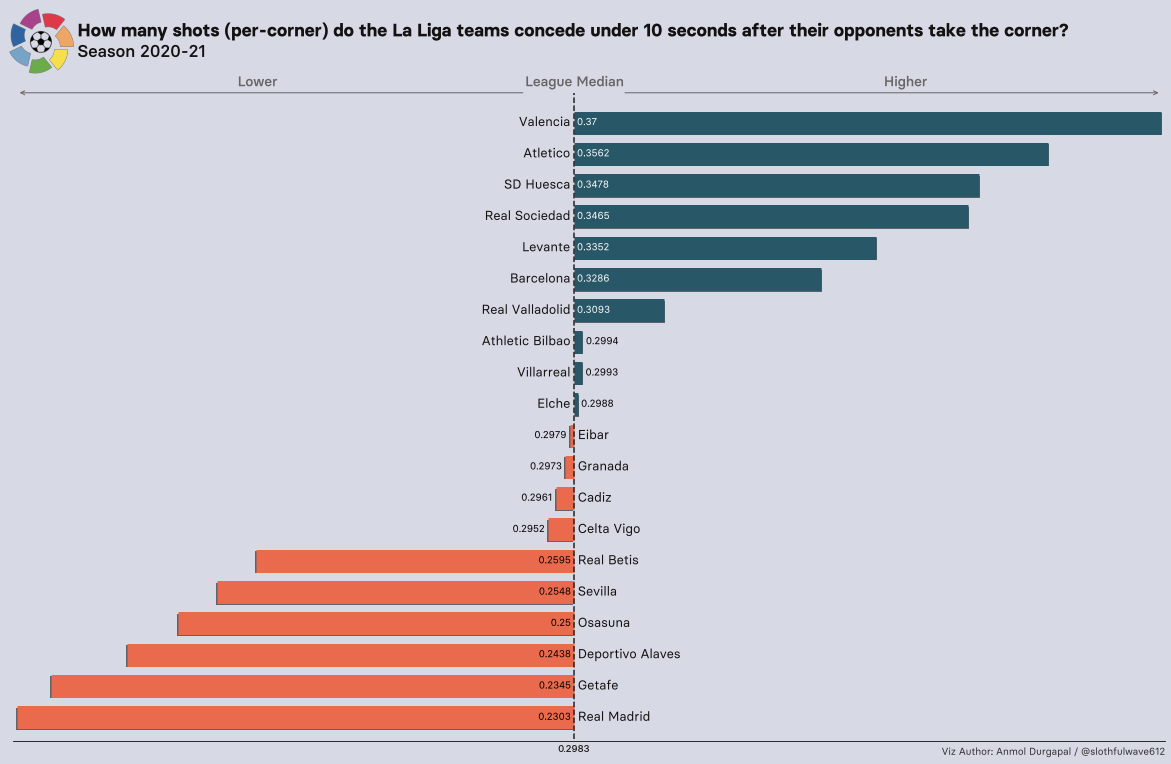

In [262]:
# hex-code: a shade of black
background_color = "#D7DAE5"
text_color = "#121212"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(20,20)
)

# set the background color for the axes
ax.set_facecolor(background_color)

# set aspect ratio
adjustFigAspect(fig, 16/9)

# make cmap
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom cmap', ["#F0A693", '#285867'], N=400)

# fetch colors
colors = cmap(rescale(shots))

for index, (team, pos, shot, color) in enumerate(zip(teams, range(0,len(teams)), shots, colors)):
    if shot > median_value:
        color = "#285867"
        ha = "right"
        ha_ = "left"
        name = team + ' '*1
        num = ' '*1 + str(round(shot,4))
        text_col = "#FFFFFF"
        offset=(1,-1.5)
    else:
        color = "#E96A4D"
        ha = "left"
        ha_ = "right"
        name = ' '*1 + team
        num = str(round(shot,4)) + ' '*1
        text_col = "#000000"
        offset=(-1, -1.5)
        
    if 6 <= index <= 12:
        if shot > median_value:
            m = shot + 0.00005
        else:
            m = shot - 0.00005
            
        
        ax.text(
            m, pos, num, size=10, color="#000000",
            va="center", ha=ha_, fontproperties=font_normal.prop,
            path_effects=[path_effects.withStroke(linewidth=1, foreground=background_color)]
        )
    else:
        ax.text(
            median_value, pos, num, size=10, color=text_col,
            va="center", ha=ha_, fontproperties=font_normal.prop,
            path_effects=[path_effects.withStroke(linewidth=3, foreground=color)]
        )
    
    # add lines
    lines = ax.hlines(
        y=pos, xmin=median_value, xmax=shot, linewidth=23, color=color, zorder=3,
        path_effects=[
            path_effects.SimpleLineShadow(offset=offset, shadow_color="#000000", alpha=0.55, linewidth=22),
            path_effects.Normal()
        ]
    )
    
    # add texts
    ax.text(
        median_value, pos, name, size=13, color=text_color,
        va="center", ha=ha, fontproperties=font_normal.prop,
        path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
    )

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# median line
ax.plot(
    [median_value, median_value], [-0.7, 21], color="#222222", ls="--", zorder=3
)

# add rectangle
ax.add_patch(plt.Rectangle((0.89, 19.39), width=4, height=1, color=background_color, zorder=2))

# low line
ax.annotate(s='', xy=(median_value - 0.006, 19.95), xytext=(min(shots)+0.0001, 19.95), arrowprops=dict(arrowstyle='<-', color="#666666", lw=1))
ax.annotate(s='', xy=(median_value + 0.006, 19.95), xytext=(max(shots), 19.95), arrowprops=dict(arrowstyle='<-', color="#666666", lw=1))

# set ticks
plt.xticks([median_value])
plt.yticks([])

for i in ax.get_xticklabels():
    i.set_fontproperties(font_medium.prop)

# set color for tick-params
ax.tick_params(axis="both", which="both", length=0, colors="#222222", pad=3)

# make grid
ax.grid(b=True, alpha=0.05, axis="x", color="#000000")

# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 0.49, 'y': 0.732, 's': "League Median", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.72, 'y': 0.732, 's': "Higher", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.27, 'y': 0.732, 's': "Lower", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.145, 'y': 0.768, 's': "How many shots (per-corner) do the La Liga teams concede under 10 seconds after their opponents take the corner?", "color": text_color, 
        "va": "center", "fontsize": 18, "fontproperties": font_bold.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.145, 'y': 0.753, 's': "Season 2020-21", "color": text_color, 
        "va": "center", "fontsize": 17, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.90, 'y': 0.267, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": "#303030", 
        "ha": "right", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
]

for text in text_values:
    fig.text(**text)

# add image
_ = add_image(Image.open("../logos/la_liga_logo.png"), fig, 0.095, 0.735, 0.05, 0.05)
    

# arrows for annotation
    
# limit
ax.set(xlim=(min(shots)-0.0005, max(shots)+0.0005), ylim=(-0.75,19.95))

fig.savefig("../plots/La Liga/01_shots_under_10/01_shots_under_10.jpg", dpi=500, bbox_inches="tight", pad_inches=0.03)

plt.show()

## Annotations

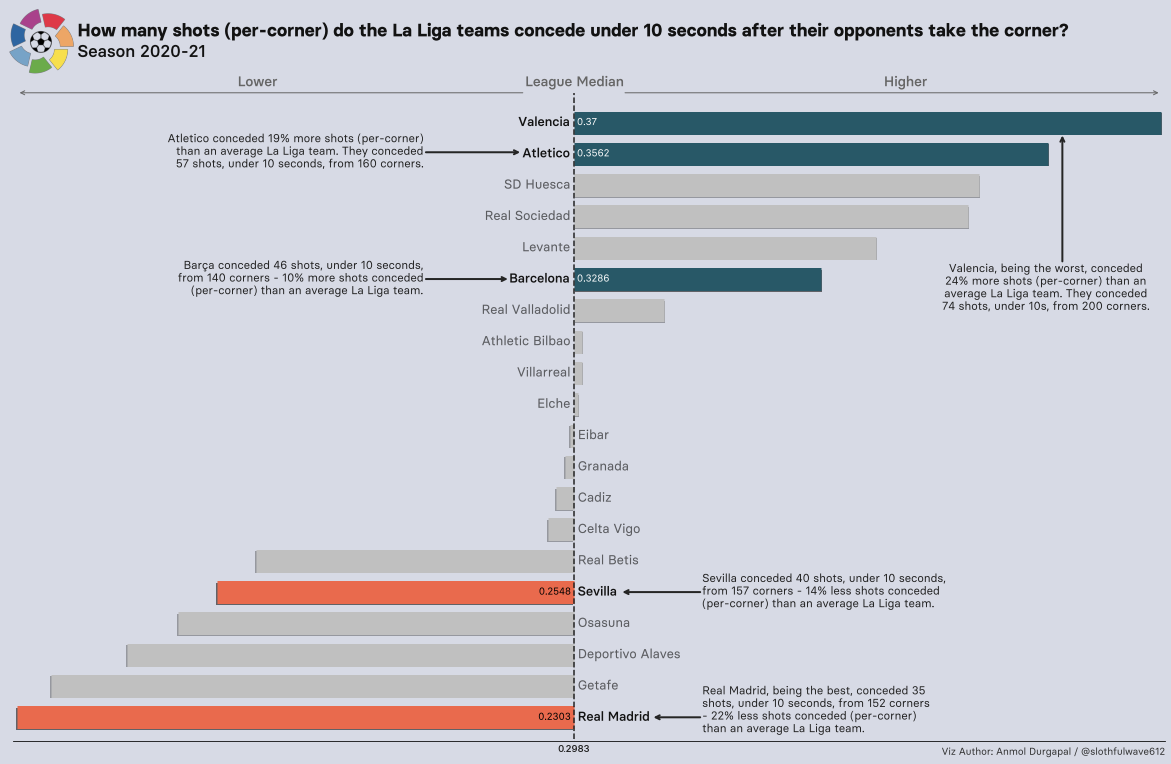

In [293]:
# hex-code: a shade of black
background_color = "#D7DAE5"
text_color = "#121212"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(20,20)
)

# set the background color for the axes
ax.set_facecolor(background_color)

# set aspect ratio
adjustFigAspect(fig, 16/9)

# make cmap
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom cmap', ["#F0A693", '#285867'], N=400)

# fetch colors
colors = cmap(rescale(shots))

for index, (team, pos, shot, color) in enumerate(zip(teams, range(0,len(teams)), shots, colors)):
    if shot > median_value:
        color = "#285867"
        ha = "right"
        ha_ = "left"
        name = team + ' '*1
        num = ' '*1 + str(round(shot,4))
        text_col = "#FFFFFF"
        offset=(1,-1.5)
    else:
        color = "#E96A4D"
        ha = "left"
        ha_ = "right"
        name = ' '*1 + team
        num = str(round(shot,4)) + ' '*1
        text_col = "#000000"
        offset=(-1, -1.5)
        
        
    if team in ["Valencia", "Barcelona", "Real Madrid", "Atletico", "Sevilla"]:
        # add lines
        lines = ax.hlines(
            y=pos, xmin=median_value, xmax=shot, linewidth=23, color=color, zorder=3,
            path_effects=[
                path_effects.SimpleLineShadow(offset=offset, shadow_color="#000000", alpha=0.55, linewidth=22),
                path_effects.Normal()
            ]
        )
        
        if 6 <= index <= 12:
            if shot > median_value:
                m = shot + 0.00005
            else:
                m = shot - 0.00005

            ax.text(
                m, pos, num, size=10, color="#000000",
                va="center", ha=ha_, fontproperties=font_normal.prop,
                path_effects=[path_effects.withStroke(linewidth=1, foreground=background_color)]
            )
        else:
            ax.text(
                median_value, pos, num, size=10, color=text_col,
                va="center", ha=ha_, fontproperties=font_normal.prop,
                path_effects=[path_effects.withStroke(linewidth=3, foreground=color)]
            )
            
        alpha = 1
        fontproperties=font_medium.prop
        
    else:
        # add lines
        lines = ax.hlines(
            y=pos, xmin=median_value, xmax=shot, linewidth=23, color="#C0C0C0", zorder=3,
            path_effects=[
                path_effects.SimpleLineShadow(offset=offset, shadow_color="#000000", alpha=0.3, linewidth=22),
                path_effects.Normal()
            ]
        )
        
        alpha = 0.5
        fontproperties=font_normal.prop
    
    # add texts
    ax.text(
        median_value, pos, name, size=13, color=text_color, alpha=alpha,
        va="center", ha=ha, fontproperties=fontproperties,
        path_effects=[path_effects.withStroke(linewidth=3, foreground=background_color)]
    )

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# median line
ax.plot(
    [median_value, median_value], [-0.7, 21], color="#222222", ls="--", zorder=3
)

# add rectangle
ax.add_patch(plt.Rectangle((0.89, 19.39), width=4, height=1, color=background_color, zorder=2))

# low line
ax.annotate(s='', xy=(median_value - 0.006, 19.95), xytext=(min(shots)+0.0001, 19.95), arrowprops=dict(arrowstyle='<-', color="#666666", lw=1))
ax.annotate(s='', xy=(median_value + 0.006, 19.95), xytext=(max(shots), 19.95), arrowprops=dict(arrowstyle='<-', color="#666666", lw=1))

# set ticks
plt.xticks([median_value])
plt.yticks([])

for i in ax.get_xticklabels():
    i.set_fontproperties(font_medium.prop)

# set color for tick-params
ax.tick_params(axis="both", which="both", length=0, colors="#222222", pad=3)

# make grid
ax.grid(b=True, alpha=0.05, axis="x", color="#000000", )

# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 0.49, 'y': 0.732, 's': "League Median", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.72, 'y': 0.732, 's': "Higher", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.27, 'y': 0.732, 's': "Lower", "color": "#666666", 
        "ha": "center", "va": "center", "fontsize": 14, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.145, 'y': 0.768, 's': "How many shots (per-corner) do the La Liga teams concede under 10 seconds after their opponents take the corner?", "color": text_color, 
        "va": "center", "fontsize": 18, "fontproperties": font_bold.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.145, 'y': 0.753, 's': "Season 2020-21", "color": text_color, 
        "va": "center", "fontsize": 17, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.90, 'y': 0.267, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": "#303030", 
        "ha": "right", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
]

for text in text_values:
    fig.text(**text)

# add image
_ = add_image(Image.open("../logos/la_liga_logo.png"), fig, 0.095, 0.735, 0.05, 0.05)
    

# arrows for annotation
ax.annotate(s='', xy=(0.358, 14.5), xytext=(0.358, 18.65), arrowprops=dict(arrowstyle='<-', color="#252525", lw=2), zorder=5)
ax.annotate(s='', xy=(0.28, 18.05), xytext=(0.292, 18.05), arrowprops=dict(arrowstyle='<-', color="#252525", lw=2), zorder=5)
ax.annotate(s='', xy=(0.28, 14), xytext=(0.2905, 14), arrowprops=dict(arrowstyle='<-', color="#252525", lw=2), zorder=5)
ax.annotate(s='', xy=(0.314, 4), xytext=(0.304, 4), arrowprops=dict(arrowstyle='<-', color="#252525", lw=2), zorder=5)
ax.annotate(s='', xy=(0.314, 0), xytext=(0.3078, 0), arrowprops=dict(arrowstyle='<-', color="#252525", lw=2), zorder=5)


# texts annotate
text_values = [
    {
        'x': 0.356, 'y': 13.7, 's': "Valencia, being the worst, conceded\n24% more shots (per-corner) than an\naverage La Liga team. They conceded\n74 shots, under 10s, from 200 corners.", "color": "#222222", 
        "ha": "center", "va": "center", "fontsize": 11.5, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.28, 'y': 18.05, 's': "Atletico conceded 19% more shots (per-corner)\nthan an average La Liga team. They conceded\n57 shots, under 10 seconds, from 160 corners.", "color": "#222222", 
        "ha": "right", "va": "center", "fontsize": 11.5, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.28, 'y': 14, 's': "Barça conceded 46 shots, under 10 seconds,\nfrom 140 corners - 10% more shots conceded\n(per-corner) than an average La Liga team.", "color": "#222222", 
        "ha": "right", "va": "center", "fontsize": 11.5, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.314, 'y': 4, 's': "Sevilla conceded 40 shots, under 10 seconds,\nfrom 157 corners - 14% less shots conceded\n(per-corner) than an average La Liga team.", "color": "#222222", 
        "ha": "left", "va": "center", "fontsize": 11.5, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.314, 'y': 0.21, 's': "Real Madrid, being the best, conceded 35\nshots, under 10 seconds, from 152 corners\n- 22% less shots conceded (per-corner)\nthan an average La Liga team.", "color": "#222222", 
        "ha": "left", "va": "center", "fontsize": 11.5, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
]

for text in text_values:
    ax.text(**text)
    
# limit
ax.set(xlim=(min(shots)-0.0005, max(shots)+0.0005), ylim=(-0.75,19.95))

fig.savefig("../plots/La Liga/01_shots_under_10/02_shots_under_10.jpg", dpi=500, bbox_inches="tight", pad_inches=0.03)

plt.show()

In [266]:
d

{'Getafe': 34,
 'Real Madrid': 35,
 'Sevilla': 40,
 'Real Betis': 41,
 'Eibar': 42,
 'Villarreal': 44,
 'Real Sociedad': 44,
 'Osasuna': 44,
 'Barcelona': 46,
 'Athletic Bilbao': 47,
 'Deportivo Alaves': 49,
 'Celta Vigo': 49,
 'Elche': 49,
 'Granada': 55,
 'SD Huesca': 56,
 'Atletico': 57,
 'Real Valladolid': 60,
 'Levante': 60,
 'Cadiz': 61,
 'Valencia': 74}

In [265]:
corner_data

{'Eibar': 141,
 'Granada': 185,
 'Cadiz': 206,
 'Deportivo Alaves': 201,
 'Real Valladolid': 194,
 'Villarreal': 147,
 'Valencia': 200,
 'Getafe': 145,
 'Celta Vigo': 166,
 'SD Huesca': 161,
 'Real Betis': 158,
 'Real Sociedad': 127,
 'Elche': 164,
 'Osasuna': 176,
 'Atletico': 160,
 'Barcelona': 140,
 'Real Madrid': 152,
 'Sevilla': 157,
 'Athletic Bilbao': 157,
 'Levante': 179}

In [173]:
((shots - median_value) / median_value) * 100

array([-22.81502844, -21.40060433, -18.2837714 , -16.19917373,
       -14.59788406, -13.01686388,  -1.05444609,  -0.74076889,
        -0.34496336,  -0.152207  ,   0.152207  ,   0.33296206,
         0.34748623,   3.67112528,  10.13822881,  12.35864974,
        16.13342853,  16.59245394,  19.41617743,  24.02522287])

In [229]:
shots

array([0.23026316, 0.23448276, 0.24378109, 0.25      , 0.25477707,
       0.25949367, 0.29518072, 0.2961165 , 0.2972973 , 0.29787234,
       0.29878049, 0.29931973, 0.29936306, 0.30927835, 0.32857143,
       0.33519553, 0.34645669, 0.34782609, 0.35625   , 0.37      ])

In [228]:
46/140

0.32857142857142857

In [178]:
d = json.load(open("../_data_/shot_counts.json"))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=False)}
d

{'Getafe': 34,
 'Real Madrid': 35,
 'Sevilla': 40,
 'Real Betis': 41,
 'Eibar': 42,
 'Villarreal': 44,
 'Real Sociedad': 44,
 'Osasuna': 44,
 'Barcelona': 46,
 'Athletic Bilbao': 47,
 'Deportivo Alaves': 49,
 'Celta Vigo': 49,
 'Elche': 49,
 'Granada': 55,
 'SD Huesca': 56,
 'Atletico': 57,
 'Real Valladolid': 60,
 'Levante': 60,
 'Cadiz': 61,
 'Valencia': 74}

In [177]:
corner_data

{'Eibar': 141,
 'Granada': 185,
 'Cadiz': 206,
 'Deportivo Alaves': 201,
 'Real Valladolid': 194,
 'Villarreal': 147,
 'Valencia': 200,
 'Getafe': 145,
 'Celta Vigo': 166,
 'SD Huesca': 161,
 'Real Betis': 158,
 'Real Sociedad': 127,
 'Elche': 164,
 'Osasuna': 176,
 'Atletico': 160,
 'Barcelona': 140,
 'Real Madrid': 152,
 'Sevilla': 157,
 'Athletic Bilbao': 157,
 'Levante': 179}

## Bar Charts

In [189]:
data = json.load(open("../_data_/shot_counts.json"))
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=False)}

data

{'Getafe': 34,
 'Real Madrid': 35,
 'Sevilla': 40,
 'Real Betis': 41,
 'Eibar': 42,
 'Villarreal': 44,
 'Real Sociedad': 44,
 'Osasuna': 44,
 'Barcelona': 46,
 'Athletic Bilbao': 47,
 'Deportivo Alaves': 49,
 'Celta Vigo': 49,
 'Elche': 49,
 'Granada': 55,
 'SD Huesca': 56,
 'Atletico': 57,
 'Real Valladolid': 60,
 'Levante': 60,
 'Cadiz': 61,
 'Valencia': 74}

In [203]:
corner_data

{'Eibar': 141,
 'Granada': 185,
 'Cadiz': 206,
 'Deportivo Alaves': 201,
 'Real Valladolid': 194,
 'Villarreal': 147,
 'Valencia': 200,
 'Getafe': 145,
 'Celta Vigo': 166,
 'SD Huesca': 161,
 'Real Betis': 158,
 'Real Sociedad': 127,
 'Elche': 164,
 'Osasuna': 176,
 'Atletico': 160,
 'Barcelona': 140,
 'Real Madrid': 152,
 'Sevilla': 157,
 'Athletic Bilbao': 157,
 'Levante': 179}

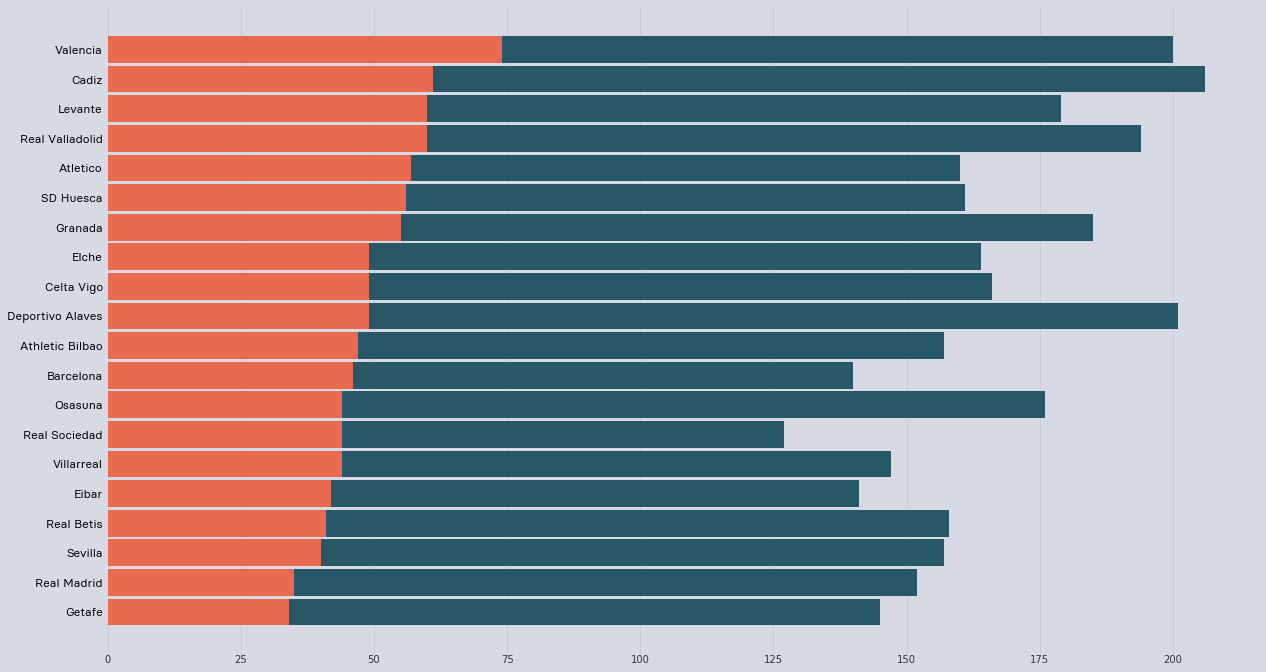

In [196]:
# hex-code: a shade of black
background_color = "#D7DAE5"
text_color = "#121212"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(20,20)
)

# set the background color for the axes
ax.set_facecolor(background_color)

# set aspect ratio
adjustFigAspect(fig, 16/9)

# make cmap
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom cmap', ["#F0A693", '#285867'], N=400)

# fetch colors
colors = cmap(rescale(shots_per_90))

for team, pos, shot in zip(data.keys(), range(0,len(teams)), data.values()):
    # add lines
    ax.barh(
        y=team, width=corner_data[team], color="#285867", zorder=3, height=0.9
    )
    ax.barh(
        y=team, width=shot, color="#E96A4D", zorder=3, height=0.9
    )

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# median line
# ax.plot(
#     [median_value, median_value], [-0.5, 21], color="#222222", ls="--", zorder=3
# )

# set ticks
# plt.xticks(np.linspace(0, 90, 10), fontproperties=font_normal.prop, size=10.5)

# yticks
for i in ax.get_yticklabels():
    i.set_fontproperties(font_normal.prop)
    i.set_size(12)

# # set color for tick-params
ax.tick_params(axis="y", which="both", length=0, colors="#000000", pad=5)
ax.tick_params(axis="x", which="both", length=0, colors="#333333", pad=0)

# make grid
ax.grid(b=True, alpha=0.08, axis="x", color="#000000", )


# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 0.07, 'y': 0.743, 's': "How many shots have the La Liga teams conceded under 10 seconds after their opponents take the corner?", "color": text_color, 
        "va": "center", "fontsize": 20, "fontproperties": font_bold.prop,
        "path_effects": [path_effects.withStroke(linewidth=2, foreground=background_color)]
    },
    {
        'x': 0.07, 'y': 0.728, 's': "Season 2020-21", "color": text_color, 
        "va": "center", "fontsize": 17, "fontproperties": font_medium.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
#     {
#         'x': 0.905, 'y': 0.26, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": "#333333", 
#         "ha": "right", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
#     },
]

# for text in text_values:
#     fig.text(**text)

# add image
# _ = add_image(Image.open("../logos/la_liga_logo.png"), fig, 0.02, 0.71, 0.05, 0.05)
    

# # limit
# ax.set(xlim=(0,90.05), ylim=(-0.8,20))

# fig.savefig("../plots/test_plots/test_bar_2.jpg", dpi=500, bbox_inches="tight", pad_inches=0.05)




plt.show()

In [5]:
df = pd.read_pickle("../_data_/events.pkl")

In [7]:
pd.set_option("display.max_rows", None)

In [70]:
from mplsoccer import PyPizza, add_image, FontManager

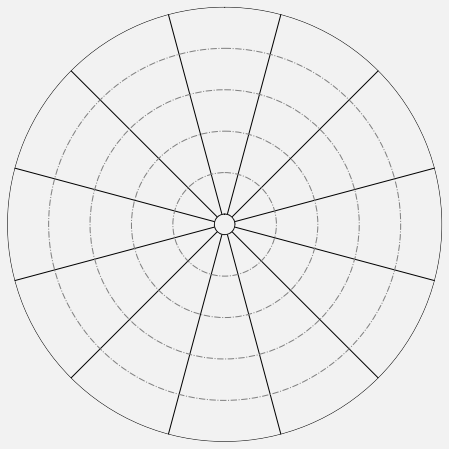

In [83]:
# parameter list
params = [""]*12

# values for corresponding parameters
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [0]*12

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_values=dict(alpha=0)
)

plt.show()

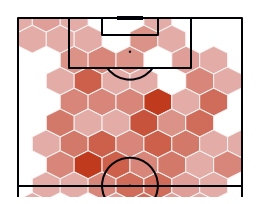

In [202]:
from urllib.request import urlopen

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text

from mplsoccer import VerticalPitch, add_image, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG

kwargs = {'related_event_df': False, 'shot_freeze_frame_df': False,
          'tactics_lineup_df': False, 'warn': False}
df_false9 = read_event(f'{EVENT_SLUG}/69249.json', **kwargs)['event']
df_before_false9 = read_event(f'{EVENT_SLUG}/69251.json', **kwargs)['event']
# filter messi's actions (starting positions)
df_false9 = df_false9.loc[df_false9.player_id == 5503, ['x', 'y']]
df_before_false9 = df_before_false9.loc[df_before_false9.player_id == 5503, ['x', 'y']]

flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)


#PLOT THE PITCH


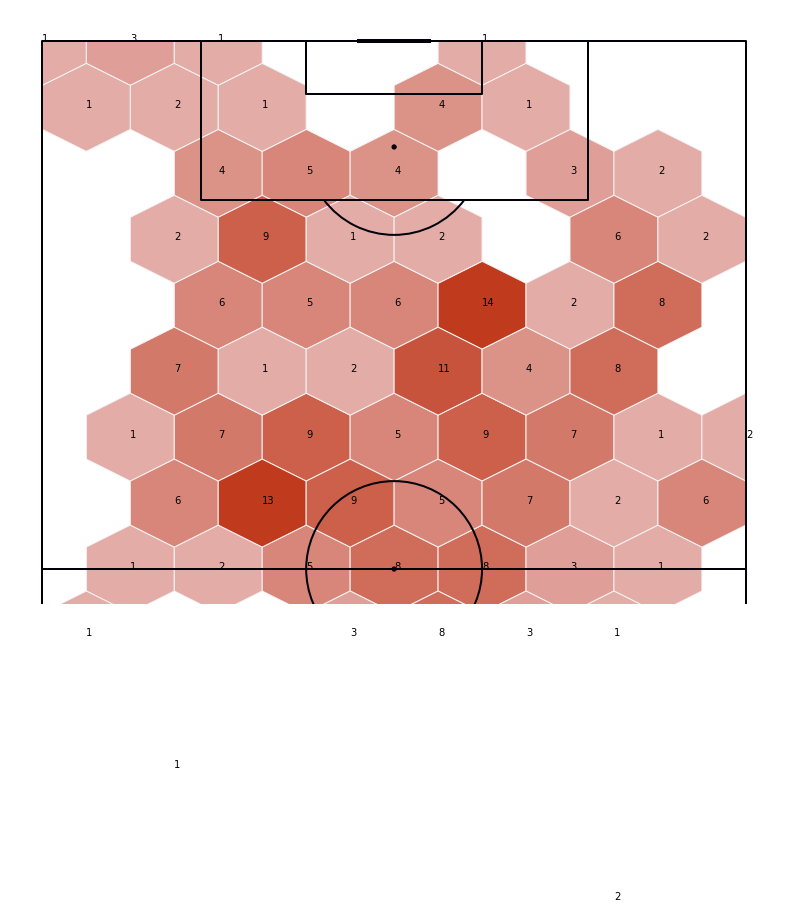

In [214]:

pitch = VerticalPitch(line_color='#000009', line_zorder=2, pitch_color='white', half=True)
fig, ax = pitch.draw(figsize=(16, 11))
hexmap = pitch.hexbin(df_false9.x, df_false9.y, ax=ax, edgecolors='#f4f4f4',
                      gridsize=(8, 8), cmap=flamingo_cmap)

for x, val in zip(hexmap.get_offsets(), hexmap.get_array()):
    ax.text(x[0], x[1], s=int(val), c="k")

# ax.set(ylim=(80, 120))

In [207]:
ax.get_ylim()

(56.0, 124.0)